# Pre-computed noise approach

In [61]:
from fireplace.lights.noise import load_noise, noise_files_dir
from matplotlib import pyplot as plt
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

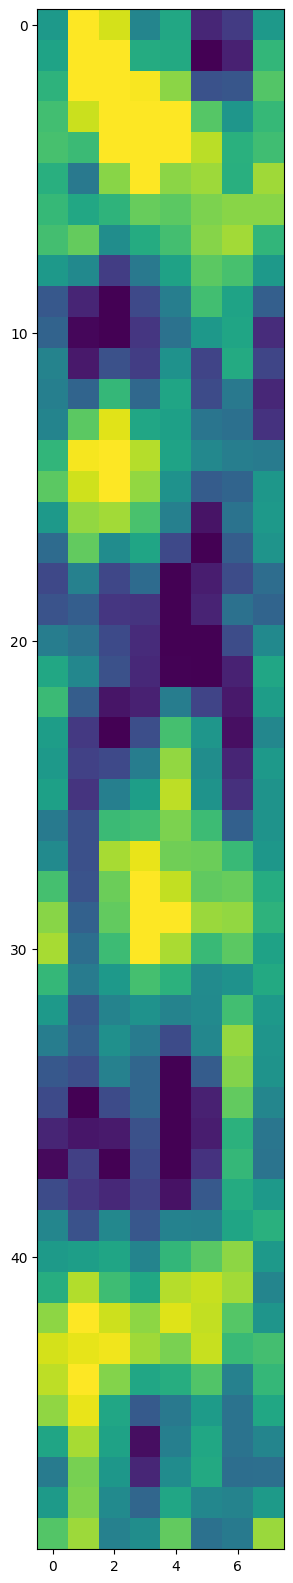

In [62]:
noise = load_noise(noise_files_dir)
noise_back = load_noise(noise_files_dir)

plt.figure(figsize = (5,20))
plt.imshow(noise[:50],interpolation="nearest")

screen_size = (8,8)




In [63]:
from collections import deque
from fireplace.lights.noise import quadratic_mask
from utils import ColorMap, hex_to_rgb
import numpy as np

# https://coolors.co/260c02-482d45-542c0b-a95404-d46d2a-f6a362-fdf37d
HEX_PALETTE = ["260c02", "482d45", "542c0b", "a95404", "d46d2a", "f6a362", "fdf37d"]
rgb_palette = [hex_to_rgb(color) for color in HEX_PALETTE]

colormap = ColorMap(rgb_palette)

test_mask = quadratic_mask(screen_size, 0.6, 1.2).T


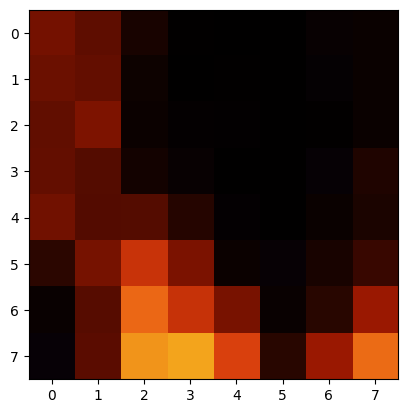

In [64]:
#%%time

window = screen_size[1]
max_step = noise.shape[0]-window
step = 0
for i in range(100):
    if step < max_step:
        screen = noise[step:(step+window)]
    else:
        step = 0
        noise = noise_back
        max_step = noise.shape[0]-window
        noise_back = load_noise(noise_files_dir)
        screen = noise[step:(step+window)]
    step+=1
    image = screen*test_mask
    image = colormap(image)
    # show
    plt.imshow(image)
    plt.show()  # show the plot
    sleep(0.00)  # pause for a second
    clear_output(wait=True)  # clear the output for the next loop



In [47]:
#%%time

screen = deque()
noise_iter = iter(noise)

for i in range(screen_size[1]):
    row = next(noise_iter)
    screen.append(row)

for i in range(50000):
    try:
        row = next(noise_iter)
    except StopIteration:
        noise_iter = iter(noise_back)
        noise_back = load_noise(noise_files_dir)
        row = next(noise_iter)

    # compile new screen
    screen.popleft()
    screen.append(row)

    window = np.array(screen)

    image = colormap(screen*test_mask)

    #plt.imshow(image)
    #plt.show()  # show the plot
    #sleep(0.00)  # pause for a second
    #clear_output(wait=True)  # clear the output for the next loop




CPU times: user 1.97 s, sys: 9.39 ms, total: 1.98 s
Wall time: 1.99 s


# Old code to dynamically generate the noise

pixel size too small already at octave 4


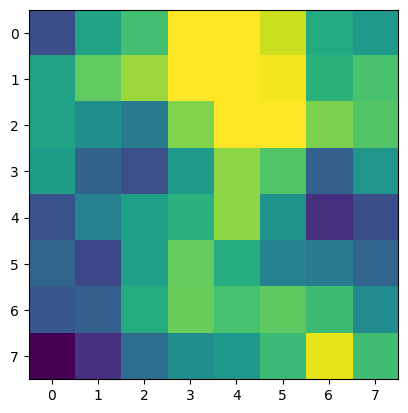

In [50]:
from time import sleep
from typing import List, Tuple
from matplotlib import pyplot as plt
import numpy as np
from fireplace.lights.noise import PerlinNoise

perlin = PerlinNoise(shape=(8,8))

noise = perlin.render(octaves=5,pixel_offset=(0,10))
plt.imshow(noise.T)

In [53]:
%%time

for shift in range(50000):
    noise = perlin.render(octaves=4,pixel_offset=(0,shift))
    #plt.imshow(noise.T)
    #plt.show()  # show the plot
    #sleep(0.0)  # pause for a second
    #clear_output(wait=True)  # clear the output for the next loop"""

CPU times: user 35.4 s, sys: 49.4 ms, total: 35.5 s
Wall time: 35.6 s


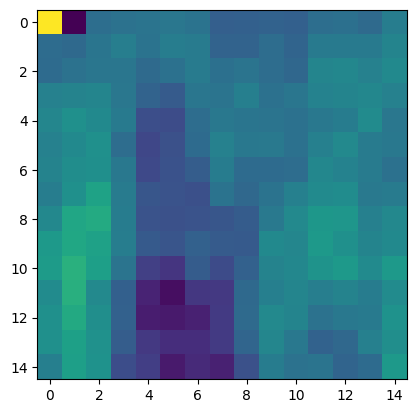

In [8]:
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from noise import PerlinNoise, quadratic_mask

size = (15, 15)

perlin = PerlinNoise(shape=size, repetition_period=200)
test_mask = quadratic_mask(size, 0.6, 1.2)


for shift in range(50):
    noise = perlin.render(octaves=4, pixel_offset=(0, shift), relative_factor=2)
    image = (noise * test_mask).T
    image[0, 0] = 1
    image[0, 1] = 0
    plt.imshow(image)
    plt.show()  # show the plot
    sleep(0.05)  # pause for a second
    clear_output(wait=True)  # clear the output for the next loop
# print(p)

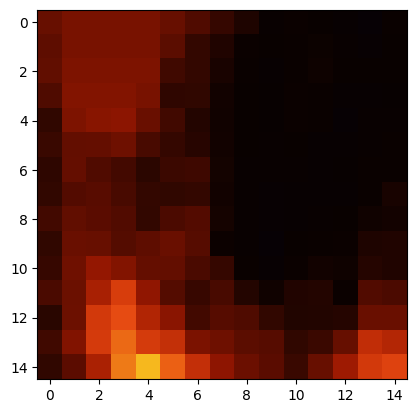

In [9]:
from utils import ColorMap, hex_to_rgb

# https://coolors.co/260c02-482d45-542c0b-a95404-d46d2a-f6a362-fdf37d
HEX_PALETTE = ["260c02", "482d45", "542c0b", "a95404", "d46d2a", "f6a362", "fdf37d"]
rgb_palette = [hex_to_rgb(color) for color in HEX_PALETTE]

colormap = ColorMap(rgb_palette)

for shift in range(200):
    noise = perlin.render(octaves=4, pixel_offset=(0, shift), relative_factor=2)
    image = (noise * test_mask).T
    plt.imshow(colormap(image))
    plt.show()  # show the plot
    sleep(0.05)  # pause for a second
    clear_output(wait=True)  # clear the output for the next loop

(8, 8)


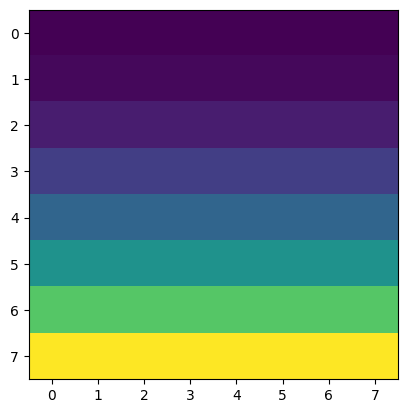

In [6]:
test_mask = quadratic_mask((8, 8), 0, 1)
print(test_mask.shape)
plt.imshow(test_mask.T)